# Introduction to machine learning

*Maxime Sangnier*

Fall, 2022

## Practical session 2: kernel methods for classification and regression

# Table of contents
1. [Intuitive approach to SVM](#part1)
1. [Classification](#part2)
1. [Regression](#part3)
1. [Regression with precomputed kernel](#part4)
1. [Duality gap](#part5)


In [1]:
from mllab import *


Packages:
	nympy as np
	matplotlib.pyplot as plt
	seaborn as sns

Functions:
	plotXY
	plot_frontiere
	map_regions
	covariance
	plot_cov
	sample_gmm
	scatter
	plot_level_set
	gaussian_sample



# Intuitive approach to SVM <a id="part1"></a>


>The following expression enables to assess, in real time, the impact of a kernel and of the tradeoff parameter $C = \frac{1}{n\lambda}$.

In [2]:
!python3 svm_gui.py


Libsvm GUI

A simple graphical frontend for Libsvm mainly intended for didactic
purposes. You can create data points by point and click and visualize
the decision region induced by different kernels and parameter settings.

To create positive examples click the left mouse button; to create
negative examples click the right button.

If all examples are from the same class, it uses a one-class SVM.




>Make some tests with this GUI.
In particular, design
- linearly separable data / or not;
- unimodal classes / or not,

>and compare
- different kernels;
- different values for C and for hyperparameters (kernel parameters).

>For unimodal classes (first, linearly separable, then not), how do the margin and the frontiere behave with respect to $C$ (for a linear kernel) and to $\gamma$ (for a Gaussian kernel)?

>Are the values for these two parameters decisive for obtaining good classification rates?

**Answer**

$C$ is a parameter for tuning the tradeoff between margin maximization and empirical error minimization.
The smaller $C$, the bigger the margin, whereas the bigger $C$, the smaller the margin (the classifier is in favor of a good classification rate on training data).

For a Gaussian kernel, $\gamma$ defines the ``radius of curvature'' of the classifier frontiere.
The smaller gamma, the straighter the frontiere, whereas for big gammas, the frontiere has many small circles. In the limit case, there is overfitting.

In practice, even though we observe ranges of parameter values for which the classifier accuracy is constant, these parameters are decisive for a good classification.
We can observe deeply damaged performances for certain values of parameters.

>Fit a linear classifier on unimodal (but not linearly separable) classes. Add some points one at a time.

>Determine three particular areas for the classifier.
How does the classifier react when adding a point in each area?

>What can we say about the dual variable $\alpha_i$ (associated to each point $X_i$) for each area?

**Answer**

The three areas are:
1. outside the margin on the left: adding a left point has no impact ($\alpha_i = 0$) but adding a right point induces a large modification of the frontier ($\alpha_i = C$);
1. outside the margin on the right: this is the converse;
1. inside the margin: adding either a left point or a right point induces a modification
of the frontiere.
With respect to the new configuration, if the point lies in the interior of the margin, it gets $\alpha_i = C$; if it lies on the border of the margin, $\alpha_i \in [0, C]$.

>Design a very unbalanced dataset (really more points in a class than in the other).
With a linear kernel, decrease gradually the value of $C$. What do you observe?

>This penomenon can be avoided with a class-dependent weighting of the data-fitting term (parameter `class_weight` of [sklearn.svm.SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)).

**Answer**

When decreasing gradually the value of C, the frontiere goes close to the minor class. In the limit case, the frontiere goes beyond the minor class and all the points are assigned to the most represented class.

Weighting each class in the learning problem is a way to avoid this harmful effect. Then, the parameter C recovers its orginal role (the tradeoff between margin maximization and empirical error minimization) and mainly impacts the direction of the frontiere.

# Classification <a id="part2"></a>
>Let us consider the dataset defined below.

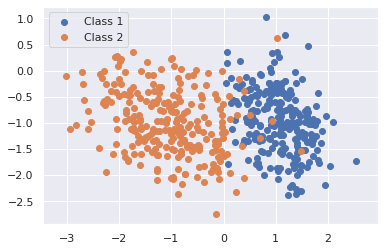

In [3]:
# Classification dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_classes=2,
                           n_features=2, n_redundant=0, n_clusters_per_class=1)

plotXY(X, y)

>Plot the decision frontieres of a [linear support vector classifier](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for $C \in \{10^{-3}, \dots, 10^{2}\}$ (and store its classification accuray, also known as score).

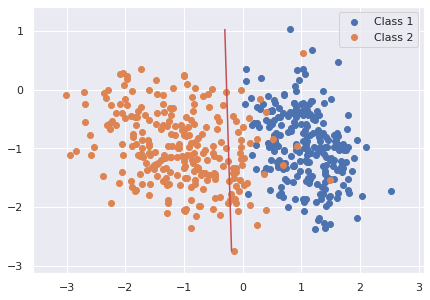

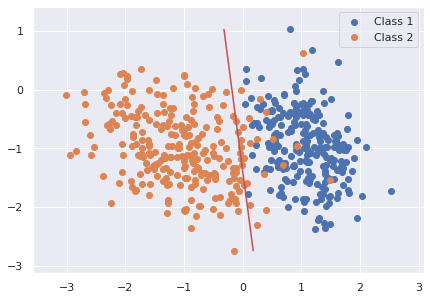

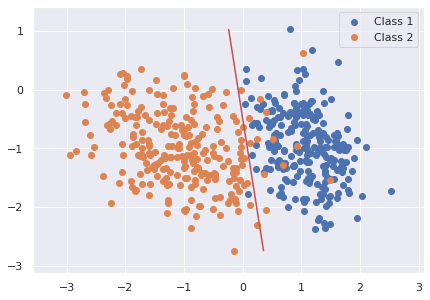

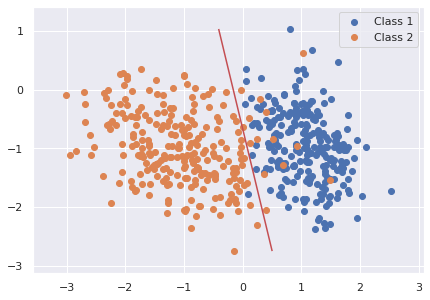

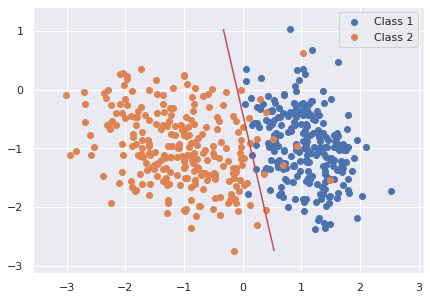

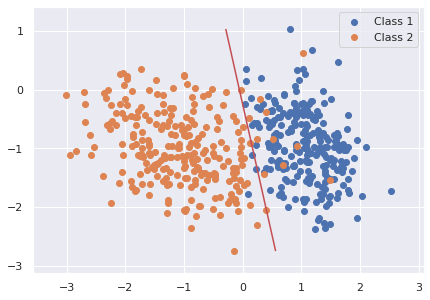

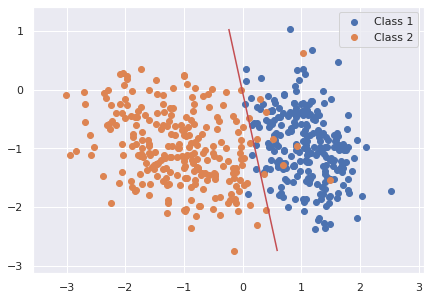

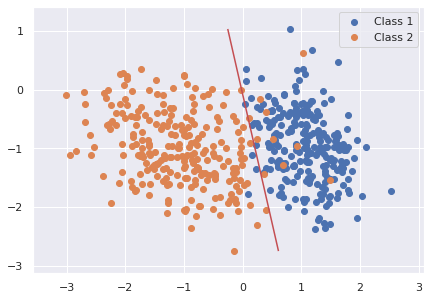

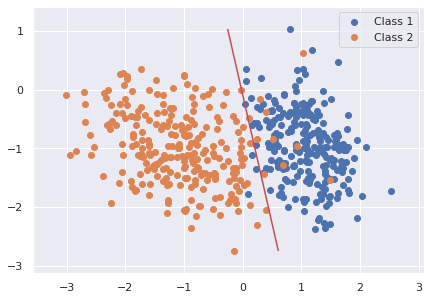

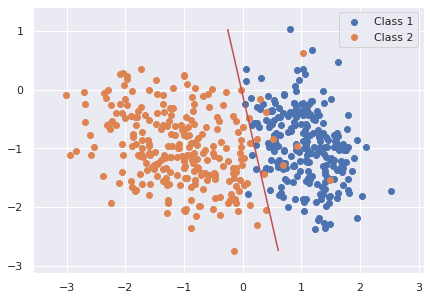

In [4]:
# Answer
from sklearn.svm import SVC

clf = SVC(kernel="linear")

C_values = np.logspace(-3, 2, num=10)
score = []
for C in C_values:
    clf.set_params(C=C)
    clf.fit(X, y)
    score.append(clf.score(X, y))
    
    plot_frontiere(clf, X, y)

>Plot the score vs the values of $C$.

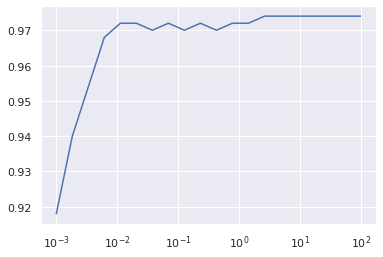

In [5]:
# Answer
from sklearn.svm import SVC

clf = SVC(kernel="linear")

C_values = np.logspace(-3, 2, num=20)
score = []
for C in C_values:
    clf.set_params(C=C)
    clf.fit(X, y)
    score.append(clf.score(X, y))
plt.xscale('log')
plt.plot(C_values, score)

>Determine the value of $C$ leading to the best score.

In [6]:
# Answer
print("Best score for C=", C_values[np.argmax(score)])

Best score for C= 2.636650898730358


# Regression <a id="part3"></a>


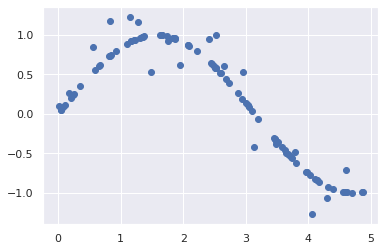

In [7]:
# Regression dataset
n = 100
X_train = np.sort(5 * np.random.rand(n))
y_train = np.sin(X_train)
y_train[::5] += 1 * (0.5 - np.random.rand(n//5))

X_test = np.arange(0, 5, step=1e-2)
y_test = np.sin(X_test)

# Make 2d-arrays
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

plt.scatter(X_train, y_train)

>What is an adequat value for the parameter $C$ of a [support vector regression](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) with a Gaussian kernel?

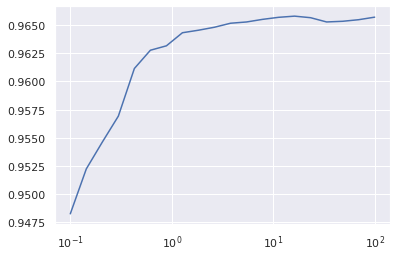

In [8]:
# Answer
from sklearn.svm import SVR

reg = SVR(kernel="rbf")

C_values = np.logspace(-1, 2, num=20)
score = []
for C in C_values:
    reg.set_params(C=C)
    reg.fit(X_train, y_train)
    score.append(reg.score(X_train, y_train))
plt.xscale('log')
plt.plot(C_values, score)

**Answer**

A linear kernel leads to poor performances and with a Gaussian kernel, it appears clearly that there is overfitting.

>Plot on the same figure the training points and the prediction for the test set.

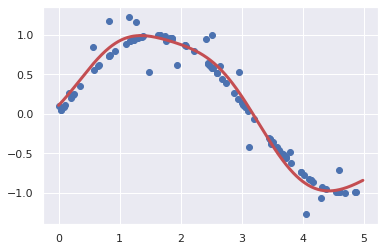

In [9]:
# Answer
reg = SVR(kernel="rbf", C=10)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, 'r', lw=3)

# Regression with precomputed kernel <a id="part4"></a>


>We focus here on molecule activity prediction.
For this purpose, we consider a molecule to be a graph, represented by a set of relations between its nodes (the atoms of the molecule).
Following these relations in a molecule $x$, we go over a path $p$ in the corresponding graph.
Let $\mathcal P_d$ be the set of all possible paths of length less than $d$ for the family of graph considered.
Let also $I(x, p)$ being $1$ if the path $p$ is in the molecule $x$ and $0$ otherwise.
Then, for two molecules $x$ and $x'$, we can define the similarity measure
$$
    u(x, x') = \sum_{p \in \mathcal P_d} I(x, p) I(x', p).
$$
The *Tanimoto kernel* is then defined by
$$
    k(x, x') = \frac{u(x, x')}{u(x, x) + u(x', x') - u(x, x')}.
$$

>Please, download the [dataset](https://perso.lpsm.paris/~msangnier/files/mlM2/data_ncicancer.zip) in the directory `./data/` and run the following script to build the train and test kernel matrices.

In [10]:
path = "data/"

# Load the data
K = np.loadtxt(path + "/ncicancer_kernel_hf_ex0.txt") # Load the kernel
y = np.loadtxt(path + "/ncicancer_targets_ex0.txt")[:, 0] # Load the targets
y = (y-np.min(y)) / (np.max(y)-np.min(y)) # Scale the targets

# Split train/test sets
indices = np.random.permutation(K.shape[0])
train_idx, test_idx = indices[:K.shape[0]//4], indices[K.shape[0]//4:]
K_train = K[train_idx][:, train_idx]
y_train = y[train_idx]
K_test = K[test_idx][:, train_idx]
y_test = y[test_idx]

print("Number of training examples:", K_train.shape[0])
print("Number of test examples:", K_test.shape[0])

Number of training examples: 576
Number of test examples: 1729


>We would like to apply support vector regression.
Plot the training and test accuracies for $C=10^{-1}$ and different values of $\epsilon$ in $[10^{-3}, 10^{-1}]$.

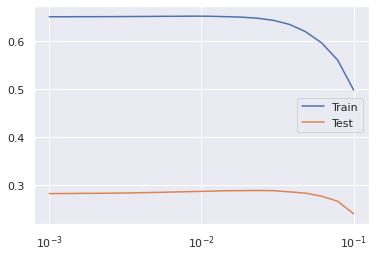

In [11]:
# Answer
from sklearn.svm import SVR

epsilon_range = np.logspace(-3, -1, 20, base=10)

acc_train = []
acc_test = []
for eps in epsilon_range:
    reg = SVR(kernel='precomputed', epsilon=eps, C=1e-1)
    reg.fit(K_train, y_train)
    acc_train.append(reg.score(K_train, y_train))
    acc_test.append(reg.score(K_test, y_test))
    
plt.plot(epsilon_range, acc_train, label='Train')
plt.plot(epsilon_range, acc_test, label='Test')
plt.xscale('log')
plt.legend()

>Do the same with kernel regularized regression.

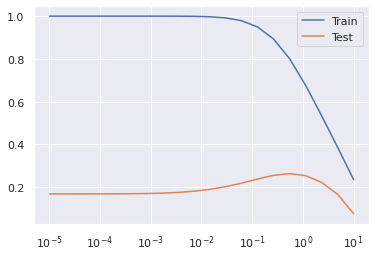

In [12]:
# Answer
from sklearn.kernel_ridge import KernelRidge as KRR

alpha_range = np.logspace(-5, 1, 20, base=10)

acc_train = []
acc_test = []
for a in alpha_range:
    reg = KRR(kernel='precomputed', alpha=a)
    reg.fit(K_train, y_train)
    acc_train.append(reg.score(K_train, y_train))
    acc_test.append(reg.score(K_test, y_test))
    
plt.plot(alpha_range, acc_train, label='Train')
plt.plot(alpha_range, acc_test, label='Test')
plt.xscale('log')
plt.legend()

>Given the kernel matrices for training and testing, give the best possible accuracy on the test sample with a kernel machine.
The testing data should not intervene in fitting the model.

In [13]:
# Answer
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-5, 5, 20, base=10)
epsilon_range = np.logspace(-5, 2, 20, base=10)
param_grid = dict(C=C_range, epsilon=epsilon_range)
clf = GridSearchCV(SVR(kernel='precomputed'), param_grid=param_grid, n_jobs=-1,
                   refit=True, cv=5)
clf.fit(K_train, y_train)

print("Best parameters: %s" % clf.best_params_)
print("Training score: %0.2f" % clf.score(K_train, y_train))
print("Test score: %0.2f" % clf.score(K_test, y_test))

Best parameters: {'C': 0.5455594781168515, 'epsilon': 0.04832930238571752}
Training score: 0.86
Test score: 0.26


>Compare to regularized regression with kernels.

In [14]:
# Answer
from sklearn.kernel_ridge import KernelRidge as KRR

alpha_range = np.logspace(-3, 3, 20, base=10)
param_grid = dict(alpha=alpha_range)
clf = GridSearchCV(KRR(kernel='precomputed'), param_grid=param_grid, n_jobs=-1,
                   refit=True, cv=5)
clf.fit(K_train, y_train)

print("Best parameters: %s" % clf.best_params_)
print("Training score: %0.2f" % clf.score(K_train, y_train))
print("Test score: %0.2f" % clf.score(K_test, y_test))

Best parameters: {'alpha': 0.3359818286283781}
Training score: 0.87
Test score: 0.26


# Duality gap <a id="part5"></a>


In [15]:
# Dataset
import numpy as np
from sklearn.datasets import load_digits

X, Y = load_digits(return_X_y=True)
Y[Y<5] = 1  # Class 1: digits 1, …, 4
Y[Y>4] = -1  # Class -1: digits 5, …, 9

ind = np.random.permutation(X.shape[0])[:X.shape[0]//4]
X = X[ind]
Y = Y[ind]

print("Digits dataset:")
print("X shape:", X.shape)
print("Labels:", Y.min(), Y.max())

Digits dataset:
X shape: (449, 64)
Labels: -1 1


>After being fitted, the object [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) has many interesting attributes:
- `coef_` (1 x #features): is the vector defining the Riesz representation (primal coefficients);
- `intercept_` (1): is the model intercept;
- `support_` (#support vectors): is the array of indexes of the support vectors;
- `dual_coef_` (1 x #support vectors): is the array of non-zero signed dual variables (that is $y_i \alpha_i$).

>Write a function, called `primal_dual(clf, X_train, y_train)`, that given a classifier object, a data matrix, and a label array, fits the classifier and returns the tuple `(primal, dual)` of primal and dual objective values.
Check, on the dataset previously loaded, that the primal and the dual objectives are close to each other.

In [16]:
# Answer
from sklearn.svm import SVC

def primal_dual(clf, X_train, y_train):
    clf.fit(X_train, y_train)
    y_pred = clf.decision_function(X_train)
    loss = 1 - y_train * y_pred
    primal = 0.5*np.sum(clf.coef_ * clf.coef_) + C*np.sum(loss[loss>0])

    K = np.dot(X_train[clf.support_], X_train[clf.support_].T)
    dual = np.sum(y_train[clf.support_] * clf.dual_coef_[0])
    dual -= 0.5* np.dot(clf.dual_coef_[0], np.dot(K, clf.dual_coef_[0]))
    return primal, dual

C = 0.01
clf = SVC(kernel='linear', C=C)
primal, dual = primal_dual(clf, X, Y)
print("Primal objective: {}".format(primal))
print("Dual objective: {}".format(dual))

Primal objective: 1.1288477858566068
Dual objective: 1.1288013111230437


>How does the duality gap (difference between primal and dual objectives) behave with respect to the optimization tolerance (parameter `tol` of [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html))?
To anwser, plot the gap with respect to the tolerance in x-log-scale.

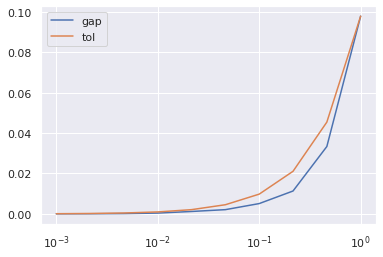

In [17]:
# Answer
import matplotlib.pyplot as plt
%matplotlib inline

gap = []
tols = np.logspace(-3, 0, 10)
for tol in tols:
    clf.set_params(tol=tol)
    primal, dual = primal_dual(clf, X, Y)
    gap.append(primal-dual)

plt.figure()
plt.plot(tols, gap, label='gap')
plt.plot(tols, tols*gap[-1]/tols[-1], label='tol')
plt.xscale('log')
plt.legend()